In [5]:
!pip install tensorflow opencv-python

In [32]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files

In [22]:
# Subir el modelo .tflite y las imágenes
uploaded = files.upload()

In [13]:
!unzip /content/IMG.zip -d /content/img

Archive:  /content/IMG.zip
  inflating: /content/img/rayador (1).jpeg  
  inflating: /content/img/rayador (2).jpeg  
  inflating: /content/img/rayador (3).jpeg  
  inflating: /content/img/rayador (4).jpeg  
  inflating: /content/img/rayador (5).jpeg  
  inflating: /content/img/rayador (6).jpeg  
  inflating: /content/img/rayador (7).jpeg  
  inflating: /content/img/pelador (1).jpeg  
  inflating: /content/img/pelador (2).jpeg  
  inflating: /content/img/pelador (3).jpeg  
  inflating: /content/img/pelador (4).jpeg  
  inflating: /content/img/pelador (5).jpeg  
  inflating: /content/img/pelador (6).jpeg  
  inflating: /content/img/pelador (7).jpeg  
  inflating: /content/img/tabla (1).jpeg  
  inflating: /content/img/tabla (2).jpeg  
  inflating: /content/img/tabla (3).jpeg  
  inflating: /content/img/tabla (4).jpeg  
  inflating: /content/img/tabla (5).jpeg  
  inflating: /content/img/colador (1).jpeg  
  inflating: /content/img/colador (2).jpeg  
  inflating: /content/img/colador (3).

In [33]:
# Cargar el modelo tflite
interpreter = tf.lite.Interpreter(model_path="modelo.tflite")
interpreter.allocate_tensors()

In [34]:
# Función para preprocesar la imagen antes de la predicción
def preprocess_image(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Redimensionar a tamaño requerido
    image = np.expand_dims(image, axis=0)  # Añadir dimensión extra para lote
    image = np.float32(image)  # Convertir a tipo flotante
    image = image / 255.0  # Normalizar
    return image

In [35]:
# Función para realizar la predicción
def predict(image_path):
    # Preprocesar la imagen
    image = preprocess_image(image_path)

    # Configurar los tensores de entrada y salida
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()

    # Obtener resultados
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data, axis=1)  # Obtener la clase con mayor probabilidad
    return prediction

In [38]:
from google.colab import files

# Subir la imagen desde tu dispositivo (escritorio)
uploaded = files.upload()

# Verifica los archivos cargados
print(uploaded)

# Obtener el nombre del archivo cargado
image_path = next(iter(uploaded))  # Obtiene el nombre del archivo cargado
print(f"Imagen cargada: {image_path}")

Saving 2024-12-10_22h38_56.jpg to 2024-12-10_22h38_56.jpg
{'2024-12-10_22h38_56.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x04\x02\x03\x03\x03\x02\x04\x03\x03\x03\x04\x04\x04\x04\x05\t\x06\x05\x05\x05\x05\x0b\x08\x08\x06\t\r\x0b\r\r\r\x0b\x0c\x0c\x0e\x10\x14\x11\x0e\x0f\x13\x0f\x0c\x0c\x12\x18\x12\x13\x15\x16\x17\x17\x17\x0e\x11\x19\x1b\x19\x16\x1a\x14\x16\x17\x16\xff\xdb\x00C\x01\x04\x04\x04\x05\x05\x05\n\x06\x06\n\x16\x0f\x0c\x0f\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\x16\xff\xc0\x00\x11\x08\x02$\x01\x0e\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x

Predicción: El objeto es un(a) Cucharón.


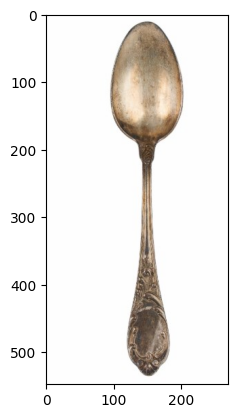

In [39]:
# Realizar la predicción
prediction = predict(image_path)

# Diccionario de clases
clases = [
    "Cuchillo",
    "Olla-Sartén-Tetera",
    "Cuchara-Tenedor",
    "Cucharón",
    "Plato",
    "Taza",
    "Colador",
    "Tabla",
    "Pelador",
    "Espátula",
    "Rayador"
]

# Mostrar la predicción en la consola
print(f"Predicción: El objeto es un(a) {clases[prediction[0]]}.")

import matplotlib.pyplot as plt

# Mostrar la imagen cargada
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para Matplotlib
plt.imshow(img)
plt.show()